# petite.csv

# Data parsing

In [7]:
using PyPlot: pygui
pygui(true)
using Plots
pyplot()

LoadError: ArgumentError: invalid gui none

In [4]:
include("import_all.jl")

write_solution_to_file (generic function with 1 method)

In [3]:
import Pkg; Pkg.add("GeoInterface")

   Updating registry at `C:\Users\LU\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\LU\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\LU\.julia\environments\v1.5\Manifest.toml`


## Reading the instance

In [1]:
data_petite = open(joinpath("..", "sujet", "petite.csv")) do file
    readlines(file)
end

33-element Array{String,1}:
 "J 3 U 2 F 3 E 2 L 13000 Gamma 1 CCam 100 CStop 10"
 "e 0 l 300"
 "e 1 l 200"
 "u 0 v 0 coor 48.8666672 2.3514623 ce e 0 cr 2 b 4 e 1 cr 4 b 5 lib j 0 e 0 b 5 r 5 e 1 b 0 r 5 j 1 e 0 b 10 r 5 e 1 b 5 r 5 j 2 e 0 b 0 r 5 e 1 b 5 r 5"
 "u 1 v 1 coor 43.6044622 1.4442469 ce e 0 cr 2 b 3 e 1 cr 4 b 6 lib j 0 e 0 b 2 r 5 e 1 b 3 r 5 j 1 e 0 b 2 r 5 e 1 b 3 r 5 j 2 e 0 b 2 r 5 e 1 b 3 r 5"
 "f 0 v 2 coor 48.8666672 2.3514623 ce e 0 cr 2 cexc 55 b 2 e 1 cr 4 cexc 30 b 6 dem j 0 e 0 b 2 r 5 e 1 b 1 r 5 j 1 e 0 b 2 r 5 e 1 b 1 r 5 j 2 e 0 b 2 r 5 e 1 b 1 r 5"
 "f 1 v 3 coor 45.7578137 4.8320114 ce e 0 cr 2 cexc 45 b 4 e 1 cr 4 cexc 40 b 5 dem j 0 e 0 b 0 r 5 e 1 b 2 r 4 j 1 e 0 b 0 r 6 e 1 b 2 r 4 j 2 e 0 b 0 r 3 e 1 b 2 r 4"
 "f 2 v 4 coor 45.7578137 4.8320114 ce e 0 cr 2 cexc 35 b 7 e 1 cr 4 cexc 50 b 4 dem j 0 e 0 b 3 r 5 e 1 b 0 r 5 j 1 e 0 b 3 r 5 e 1 b 0 r 5 j 2 e 0 b 3 r 5 e 1 b 0 r 5"
 "a 0 0 d 0"
 "a 0 1 d 10"
 "a 0 2 d 0"
 "a 0 3 d 8"
 "a 0 4 d 8"
 ⋮
 "a 2

In [8]:
dims_petite = lire_dimensions(data_petite[1])

(J = 3, U = 2, F = 3, E = 2, L = 13000, γ = 1, ccam = 100, cstop = 10)

In [9]:
emballages_petite = [lire_emballage(data_petite[1+e], dims_petite) for e = 1:dims_petite.E]

2-element Array{Emballage,1}:
 
Emballage 1
   Longueur 300
 
Emballage 2
   Longueur 200

In [10]:
usines_petite = [lire_usine(data_petite[1+dims_petite.E+u], dims_petite) for u = 1:dims_petite.U]

2-element Array{Usine,1}:
 
Usine 1
   Sommet 1
   Coordonnées (48.8666672, 2.3514623)
   Coûts stock [2, 4]
   Stock initial [4, 5]
   Libération journalière [5 10 0; 0 5 5]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [9 19 19; 5 10 15]
 
Usine 2
   Sommet 2
   Coordonnées (43.6044622, 1.4442469)
   Coûts stock [2, 4]
   Stock initial [3, 6]
   Libération journalière [2 2 2; 3 3 3]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [5 7 9; 9 12 15]

In [11]:
fournisseurs_petite = [
    lire_fournisseur(data_petite[1+dims_petite.E+dims_petite.U+f], dims_petite) for f = 1:dims_petite.F
]

3-element Array{Fournisseur,1}:
 
Fournisseur 1
   Sommet 3
   Coordonnées (48.8666672, 2.3514623)
   Coûts stock [2, 4]
   Coûts expédition carton [55, 30]
   Stock initial [2, 6]
   Consommation journalière [2 2 2; 1 1 1]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [0 0 0; 5 4 3]
 
Fournisseur 2
   Sommet 4
   Coordonnées (45.7578137, 4.8320114)
   Coûts stock [2, 4]
   Coûts expédition carton [45, 40]
   Stock initial [4, 5]
   Consommation journalière [0 0 0; 2 2 2]
   Stock maximal journalier [5 6 3; 4 4 4]
   Stock journalier [4 4 4; 3 1 0]
 
Fournisseur 3
   Sommet 5
   Coordonnées (45.7578137, 4.8320114)
   Coûts stock [2, 4]
   Coûts expédition carton [35, 50]
   Stock initial [7, 4]
   Consommation journalière [3 3 3; 0 0 0]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [4 1 0; 4 4 4]

In [12]:
graphe_petite = lire_graphe(data_petite[1+dims_petite.E+dims_petite.U+dims_petite.F+1:end], dims_petite)


Graphe pondéré avec 5 sommets et 25 arcs
   Distances (5 x 5): [0 10 0 8 8; 10 0 8 5 5; 0 8 0 8 8; 8 5 8 0 0; 8 5 8 0 0]

In [13]:
instance_petite = lire_instance(joinpath("..", "sujet", "petite.csv"))


Instance
   Nombre de jours: 3
   Nombre d'usines: 2
   Nombre de fournisseurs: 3
   Nombre de types d'emballages: 2
   Nombre de routes: 0

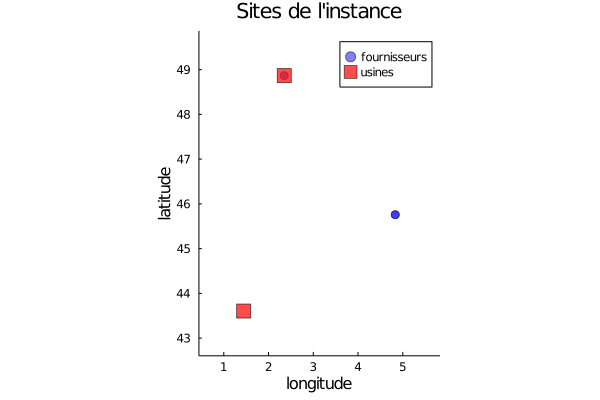

In [14]:
plot_sites(instance_petite)

# Solution

In [15]:
using JuMP
using Gurobi
import LightGraphs
const lg = LightGraphs

LightGraphs

## Func def

In [16]:
function create_graph(G_original, dims, us, fs, J_init, J_fin, e)
    U = dims.U
    F = dims.F
    J = J_fin - J_init + 1
    # J = dims.J
    cost_dispatch = dims.γ
    
    G = SimpleDiGraph((3 * U + 4 * F) * J + U + F + 1)
    capacity = zeros((3 * U + 4 * F) * J + U + F + 1, 
        (3 * U + 4 * F) * J + U + F + 1)
    cost_mat = zeros((3 * U + 4 * F) * J + U + F + 1, 
        (3 * U + 4 * F) * J + U + F + 1)
    
    for j = 1:J # for each day
        for u = 1:U # connect each u to each f stock
            for f = 1:F
                add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                    (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1)
                capacity[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                    (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1] += Inf
                cost_mat[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                    (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1] += G_original.d[u, U + f] * cost_dispatch
            end
        end
        
        for f = 1:F
            # connect fictive u (carton) to each f consommation
            add_edge!(G, nv(G), (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f)
            #add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f, nv(G)) # cycle
            capacity[nv(G), (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f] += Inf
            #capacity[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f, nv(G)] += Inf
            cost_mat[nv(G), (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f] += fs[f].cexc[e]
            # cost_mat[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f, nv(G)] += fs[f].cexc[e]
        end
    end
    
    for j = 1:J
        for u = 1:U
            # connect u day j to two additional vertices
            add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 2)
            add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3)
            
            capacity[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 2] += us[u].r[e, j + J_init - 1]
            capacity[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3] += Inf
            
            cost_mat[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3] += us[u].cs[e]
            
            if j < J
                # connect two additional vertices to u day j+1
                add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 2, 
                    j * (3 * U + 4 * F) + 3 * (u - 1) + 1)
                add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3, 
                    j * (3 * U + 4 * F) + 3 * (u - 1) + 1)
                
                capacity[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 2, 
                    j * (3 * U + 4 * F) + 3 * (u - 1) + 1] += us[u].r[e, j + J_init - 1]
                capacity[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3, 
                    j * (3 * U + 4 * F) + 3 * (u - 1) + 1] += Inf
            end
        end
        
        for f = 1:F
            # connect f stock day j to two additional vertices
            add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 2)
            add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3)
            
            capacity[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 2] += fs[f].r[e, j + J_init - 1]
            capacity[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3] += Inf
            
            cost_mat[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1, 
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3] += fs[f].cs[e]
            
            if j < J
                # connect each f stock to f consommation of the next day
                add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f + 1, j * (3 * U + 4 * F) + 3 * U + 4 * f)
                capacity[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f + 1, j * (3 * U + 4 * F) + 3 * U + 4 * f] += Inf
                
                # connect two additional vertices to f day j+1
                add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 2, 
                    j * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1)
                add_edge!(G, (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3, 
                    j * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1)
                
                capacity[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 2, 
                    j * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1] += fs[f].r[e, j + J_init - 1]
                capacity[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3, 
                    j * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1] += Inf
            end
        end
    end
    
    # connect initial stock to the stock of day 1 (for each u)
    for u = 1:U
        add_edge!(G, (3 * U + 4 * F) * J + u, 3 * (u - 1) + 1)
        
        capacity[(3 * U + 4 * F) * J + u, 3 * (u - 1) + 1] += Inf
    end
    
    # connect initial stock to the stock of day 1 (for each f) & to the f consommation of day 1
    for f = 1:F
        add_edge!(G, (3 * U + 4 * F) * J + U + f, 3 * U + 4 * (f - 1) + 1)  
        add_edge!(G, (3 * U + 4 * F) * J + U + f, 3 * U + 4 * f)
        
        capacity[(3 * U + 4 * F) * J + U + f, 3 * U + 4 * (f - 1) + 1] += Inf
        capacity[(3 * U + 4 * F) * J + U + f, 3 * U + 4 * f] += Inf
    end
    
    return G, capacity, cost_mat
end

create_graph (generic function with 1 method)

In [17]:
# for a given e
function set_demand(dims, us, fs, J_init, J_fin, e) # b parameter
    U = dims.U
    F = dims.F
    J = J_fin - J_init + 1
    # J = dims.J
    demand = zeros((3 * U + 4 * F) * J + U + F + 1)
    
    for j = 1:J
        # for each u
        for u = 1:U
            demand[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1] -= us[u].b⁺[e, j + J_init - 1]
        end
        
        # for each f consommation
        for f = 1:F
            demand[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f] += fs[f].b⁻[e, j + J_init - 1]
        end
    end
    
    # for initial stock
    for u = 1:U
        demand[J * (3 * U + 4 * F) + u] -= us[u].s0[e]
    end
    
    for f = 1:F
        demand[J * (3 * U + 4 * F) + U + f] -= fs[f].s0[e]
    end
    
    println(sum(demand))
    # additional vertices from day 1 to day J-1: b = 0
    # additional vertices of day J: b >= 0
    demand[(3 * U + 4 * F) * J + U + F + 1] += Inf # +Inf means that b is not fixed
    for u = 1:U
        demand[(J - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 2] -= Inf # -Inf means b>=0
        demand[(J - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3] -= Inf
    end
    for f = 1:F
        demand[(J - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 2] -= Inf
        demand[(J - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3] -= Inf
    end
    
    return demand
end

set_demand (generic function with 1 method)

In [81]:
function min_cost_flow(g, node_demand, edge_capacity, edge_cost, optimizer)
    m = JuMP.Model(optimizer)
    vtxs = vertices(g)
    
    source_nodes = [v for v in vtxs if node_demand[v] < 0 && node_demand[v] != -Inf]
    sink_nodes = [v for v in vtxs if node_demand[v] > 0 && node_demand[v] != Inf]
    
    idx_dict = Dict()
    ridx_dict = Dict()
    i = 1
    for e in lg.edges(g)
        idx_dict[i] = [src(e), dst(e)]
        ridx_dict[(src(e), dst(e))] = i
        i += 1
    end
    
    @variable(m, 0 <= f[i = 1:ne(g)] <= edge_capacity[idx_dict[i][1], idx_dict[i][2]], Int)
    @objective(m, Min, sum(f[i] * edge_cost[idx_dict[i][1], idx_dict[i][2]] for i = 1:ne(g)))
    # @variable(m, 0 <= f[i=vtxs, j=vtxs; (i,j) in lg.edges(g)] <= edge_capacity[i, j])
    # @objective(m, Min, sum(f[src(e),dst(e)] * edge_cost[src(e), dst(e)] for e in lg.edges(g)))

    for v in lg.vertices(g)
        if v in source_nodes
            @constraint(m,
                sum(f[ridx_dict[(v, vout)]] for vout in outneighbors(g, v)) - sum(f[ridx_dict[(vin, v)]] for vin in lg.inneighbors(g, v)) == -node_demand[v]
            )
        elseif v in sink_nodes
            @constraint(m,
                sum(f[ridx_dict[(vin, v)]] for vin in lg.inneighbors(g, v)) - sum(f[ridx_dict[(v, vout)]] for vout in outneighbors(g, v)) == node_demand[v]
            )
        else
            if node_demand[v] == -Inf
                @constraint(m, sum(f[ridx_dict[(vin, v)]] for vin in lg.inneighbors(g, v)) - sum(f[ridx_dict[(v, vout)]] for vout in outneighbors(g, v)) >= 0)
            elseif node_demand[v] != Inf
                @constraint(m,
                    sum(f[ridx_dict[(vin, v)]] for vin in lg.inneighbors(g, v)) == sum(f[ridx_dict[(v, vout)]] for vout in outneighbors(g, v))
                )
            end
        end
    end

    optimize!(m)
    ts = termination_status(m)
    result_flow = spzeros(nv(g), nv(g))
    if ts != MOI.OPTIMAL
        @warn "Problem does not have an optimal solution, status: $(ts)"
        return result_flow
    end
    for e in lg.edges(g)
        (i,j) = Tuple(e)
        result_flow[i,j] = JuMP.value(f[ridx_dict[(i,j)]])
    end
    ObjVal = MOI.get(m,MOI.ObjectiveValue())
    return result_flow, ObjVal
    
end

min_cost_flow (generic function with 1 method)

In [82]:
function run_opt(g, dims, us, fs, J_init, J_fin, e, optimizer)
    g, capacity, cost_mat = create_graph(g, dims, us, fs, J_init, J_fin, e)
    demand = set_demand(dims, us, fs, J_init, J_fin, e)
    flow, ObjVal = min_cost_flow(g, demand, capacity, cost_mat, optimizer)
    return flow, ObjVal
end

run_opt (generic function with 1 method)

In [83]:
function read_flow(flow, U, F, J_init, J_fin)
    # create a U * F * J matrix (for a given e) for dispatching
    # create a U * J matrix (for a given e) for stockage
    # create a F * J matrix (for a given e) for stockage
    # create a F * J matrix (for a given e) for carton consommation
    J = J_fin - J_init + 1
    dispatch = zeros(U, F, J)
    stock_U = zeros(U, J)
    stock_F = zeros(F, J)
    consom_carton = zeros(F, J)
    for j = 1:J
        for u = 1:U
            for f = 1:F
                dispatch[u, f, j] += flow[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1,
                    (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1]
            end
        end
        
        for u = 1:U
            stock_U[u, j] = flow[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 2] +
            flow[(j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 1, (j - 1) * (3 * U + 4 * F) + 3 * (u - 1) + 3]
        end
        
        for f = 1:F
            stock_F[f, j] = flow[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1,
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 2] + 
            flow[(j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 1,
                (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * (f - 1) + 3]
            
            consom_carton[f, j] = flow[size(flow)[1], (j - 1) * (3 * U + 4 * F) + 3 * U + 4 * f]
        end
    end
    
    return dispatch, consom_carton, stock_U, stock_F
end

read_flow (generic function with 1 method)

## Test

In [84]:
flow, ObjVal = run_opt(graphe_petite, dims_petite, usines_petite, fournisseurs_petite, 1, 3, 2, Gurobi.Optimizer)

-36.0
Academic license - for non-commercial use only - expires 2021-02-15
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 59 rows, 91 columns and 173 nonzeros
Model fingerprint: 0x27844ccc
Variable types: 0 continuous, 91 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 5e+01]
  Bounds range     [4e+00, 5e+00]
  RHS range        [1e+00, 6e+00]
Found heuristic solution: objective 682.0000000
Presolve removed 48 rows and 61 columns
Presolve time: 0.00s
Presolved: 11 rows, 30 columns, 51 nonzeros
Found heuristic solution: objective 430.0000000
Variable types: 0 continuous, 30 integer (2 binary)

Root relaxation: objective 1.070000e+02, 11 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0       

(
  [55,  1]  =  5.0
  [1 ,  2]  =  5.0
  [56,  4]  =  6.0
  [4 ,  5]  =  5.0
  [57,  7]  =  5.0
  [7 ,  8]  =  5.0
  [57, 10]  =  1.0
  [4 , 11]  =  2.0
  [58, 11]  =  3.0
  [11, 12]  =  4.0
  [58, 14]  =  2.0
  [4 , 15]  =  2.0
  ⋮
  [23, 40]  =  5.0
  [40, 41]  =  5.0
  [40, 42]  =  3.0
  [26, 43]  =  5.0
  [37, 43]  =  10.0
  [43, 44]  =  5.0
  [43, 45]  =  10.0
  [29, 46]  =  1.0
  [30, 47]  =  4.0
  [47, 48]  =  4.0
  [33, 50]  =  2.0
  [34, 51]  =  4.0
  [51, 52]  =  4.0, 107.0)

In [85]:
disp, consom_carton, stock_U, stock_F = read_flow(flow, dims_petite.U, dims_petite.F, 1, 3)

([0.0 0.0 0.0; 0.0 2.0 2.0]

[0.0 0.0 0.0; 0.0 1.0 2.0]

[10.0 0.0 0.0; 0.0 0.0 0.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [5.0 10.0 5.0; 5.0 5.0 8.0], [5.0 5.0 15.0; 4.0 4.0 4.0; 4.0 4.0 4.0])

In [68]:
sum(disp)

17.0

In [94]:
stock_U

2×3 Array{Float64,2}:
 5.0  10.0  5.0
 5.0   5.0  8.0

In [116]:
disp_all_E = zeros(dims_petite.U,dims_petite.F,dims_petite.J,dims_petite.E)
cost_flow = 0.0
for e in 1:dims_petite.E
    flow, ObjVal = run_opt(graphe_petite, dims_petite, usines_petite, fournisseurs_petite, 1, dims_petite.J, e, Gurobi.Optimizer)
    disp, consom_carton, stock_U, stock_F = read_flow(flow, dims_petite.U, dims_petite.F, 1, dims_petite.J)
    disp_all_E[:,:,:,e] = disp[:,:,:]
    cost_flow += ObjVal
    print(ObjVal)
end
cost_flow

-26.0
Academic license - for non-commercial use only - expires 2021-02-15
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 59 rows, 91 columns and 173 nonzeros
Model fingerprint: 0x40ea2833
Variable types: 0 continuous, 91 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 6e+01]
  Bounds range     [3e+00, 6e+00]
  RHS range        [2e+00, 1e+01]
Found heuristic solution: objective 534.0000000
Presolve removed 44 rows and 48 columns
Presolve time: 0.00s
Presolved: 15 rows, 43 columns, 75 nonzeros
Found heuristic solution: objective 494.0000000
Variable types: 0 continuous, 43 integer (0 binary)

Root relaxation: objective 3.000000e+01, 15 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0       

137.0

In [93]:
disp_all_E
# (u, f, j, e)

2×3×3×2 Array{Float64,4}:
[:, :, 1, 1] =
 5.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 2, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 3, 1] =
 3.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 1, 2] =
 0.0  0.0  0.0
 0.0  2.0  2.0

[:, :, 2, 2] =
 0.0  0.0  0.0
 0.0  1.0  2.0

[:, :, 3, 2] =
 10.0  0.0  0.0
  0.0  0.0  0.0

In [102]:
le = []
for e in 1: dims_petite.E
    append!(le,emballages_petite[e].l)
end
le

2-element Array{Any,1}:
 300
 200

In [45]:
stock_F

3×3 Array{Float64,2}:
 5.0  5.0  15.0
 4.0  4.0   4.0
 4.0  4.0   4.0

In [134]:
sum(usines_espagne[2].b⁺[7,:])

255

In [141]:
s = 0
for f = 1:dims_espagne.F
    s += fournisseurs_espagne[f].s0[7]
end
s

47

In [28]:
g, capacity, cost_mat = create_graph(graphe_petite, dims_petite, usines_petite, fournisseurs_petite, 1, 3, 1)

({60, 91} directed simple Int64 graph, [0.0 5.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

# First fit descreasing

In [106]:
function heur_FFD(L, items)
    n = size(items)
    order = sortperm(items, rev=true)
    bin_for_items = fill(-1,n)
    bin_space = []
    for i in order
        if length(bin_space) > 0
            for j in 1:length(bin_space)
                if items[i] <= bin_space[j]
                    bin_for_items[i] = j
                    bin_space[j] -= items[i]
                    break
                end
            end
        end

        if bin_for_items[i] < 0
            j = length(bin_space)
            bin_for_items[i] = j+1
            append!(bin_space, L-items[i])
        end
    end
    n_bins = length(bin_space)
    return n_bins, bin_for_items
end

heur_FFD (generic function with 1 method)

In [111]:
function get_items(u,f,j,disp_all_E,le,E)
    qe = disp_all_E[u,f,j,:]
    items = Int[]
    for i in 1:E
        if qe[i] != 0
            for j in 1:qe[i]
                append!(items,le[i])
            end
        end
    end
    return items
end


get_items (generic function with 1 method)

In [109]:
n_bins, bin_for_items = heur_FFD(dims_petite.L, items)
@show n_bins
cost_camion = dims_petite.ccam * n_bins

n_bins = 1


100

In [114]:
E = dims_petite.E
cost_camion = 0.0
for u in 1:dims_petite.U
    for f in 1:dims_petite.F
        for j in 1:dims_petite.J
            items = get_items(u,f,j,disp_all_E,le,E)
            n_bins, bin_for_items = heur_FFD(dims_petite.L, items)
            cost_camion += dims_petite.ccam * n_bins
        end
    end
end

In [115]:
cost_camion

600.0